In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
house_price = pd.read_csv('data/nsw_suburb_median_price -2007-2020.csv')
house_price

,qtr,property_type,median_pice,sales,suburb,postcode,state
0,31/03/2008,house,587406,1,ABBOTSBURY,2176,NSW
1,30/06/2008,house,587406,2,ABBOTSBURY,2176,NSW
2,30/09/2008,house,587406,5,ABBOTSBURY,2176,NSW
3,31/12/2008,house,587406,4,ABBOTSBURY,2176,NSW
4,31/03/2009,house,590711,2,ABBOTSBURY,2176,NSW
...,...,...,...,...,...,...,...
69224,31/03/2019,unit,816049,8,ZETLAND,2017,NSW
69225,30/06/2019,unit,811758,11,ZETLAND,2017,NSW
69226,30/09/2019,unit,808139,11,ZETLAND,2017,NSW
69227,31/12/2019,unit,804726,19,ZETLAND,2017,NSW


In [13]:
house_price['postcode'] = house_price['postcode'].astype('object')
house_price = house_price.drop(columns=['state', 'sales'])
house_price.rename(columns={'qtr': 'date', 'property_type': 'type', 'median_pice': 'price'}, inplace=True)

In [14]:
house_price.describe(include='all')

,date,type,price,suburb,postcode
count,69229,69229,6.922900e+04,69229,69229.0
unique,53,2,NaN,1157,469.0
top,30/06/2018,house,NaN,WEST WOLLONGONG,2259.0
freq,1424,54147,NaN,106,895.0
mean,NaN,NaN,7.099074e+05,NaN,NaN
std,NaN,NaN,5.211368e+05,NaN,NaN
min,NaN,NaN,9.691100e+04,NaN,NaN
25%,NaN,NaN,3.812150e+05,NaN,NaN
50%,NaN,NaN,5.477780e+05,NaN,NaN
75%,NaN,NaN,8.409080e+05,NaN,NaN


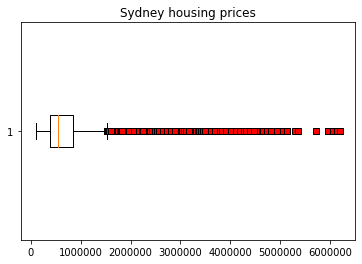

In [5]:
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Sydney housing prices')
ax1.boxplot(house_price['price'], vert=False, flierprops=red_square)
plt.show()

In [6]:
house_price.groupby(by=['suburb', 'type']).mean()

price
suburb     type               
ABBOTSBURY house  8.313419e+05
ABBOTSFORD house  1.775096e+06
           unit   1.007256e+06
ABERDARE   house  2.707604e+05
ABERDEEN   house  2.892939e+05
...                        ...
YASS       house  4.307834e+05
YERRINBOOL house  4.647730e+05
YOUNG      house  2.423062e+05
YOWIE BAY  house  1.434613e+06
ZETLAND    unit   6.500078e+05

[1424 rows x 1 columns]

#### 3.2. Handle missing data

#### 4. Explore features

#### 4.1. Group by Suburb and Property type

In [7]:
sub_mean = df.groupby(by=['suburb', 'propType']).mean().round(0)
sub_count = df.groupby(by=['suburb', 'propType']).count()
sub_mean['total'] = sub_count['postalCode']
sub_mean.rename(columns={'sellPrice': 'avgPrice'}, inplace=True)

In [8]:
sub_mean

postalCode   avgPrice  bed  bath  car  total
suburb     propType                                                          
Abbotsbury house                     2176.0  1056444.0  4.0   3.0  2.0    125
Abbotsford duplex/semi-detached      2046.0  1172000.0  2.0   2.0  3.0      1
           house                     2046.0  1967716.0  3.0   2.0  2.0    132
           terrace                   2046.0  2500000.0  3.0   2.0  2.0      1
           townhouse                 2046.0  1005160.0  2.0   2.0  2.0    100
...                                     ...        ...  ...   ...  ...    ...
Yowie Bay  villa                     2228.0   953000.0  3.0   2.0  2.0      7
Zetland    duplex/semi-detached      2017.0  1038125.0  2.0   1.0  1.0      4
           house                     2017.0  1199356.0  3.0   2.0  1.0    102
           terrace                   2017.0  1259583.0  3.0   2.0  1.0     18
           townhouse                 2017.0  1026650.0  3.0   2.0  2.0     10

[2057 rows x 6 columns]